<a href="https://colab.research.google.com/github/luizogr/Card-pio/blob/main/TrabalhoIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Função que faz a leitura dos labirintos

In [109]:
def ler_labirinto(caminho_arquivo):
    """Lê um labirinto de um arquivo de texto e o retorna como uma lista de listas."""
    labirinto = []
    try:
        with open(caminho_arquivo, 'r') as f:
            for linha in f:
                labirinto.append(list(linha.strip().replace(' ', '')))
                #labirinto.append(list(linha.strip()
    except FileNotFoundError:
        print(f"Erro: O arquivo {caminho_arquivo} não foi encontrado.")
        return None
    return labirinto

# Substitua 'labirinto.txt' pelo caminho para o seu arquivo
caminho_do_arquivo = '/labirintoestrela.txt'
meu_labirinto = ler_labirinto(caminho_do_arquivo)
print(meu_labirinto)

if meu_labirinto:
    for linha in meu_labirinto:
        print("".join(linha))

[['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1'], ['1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1'], ['1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1'], ['1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1'], ['1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1'], ['1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1'], ['1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1'], ['1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0',

Agente Reativo Simples

In [110]:
import time

def mover_cima(labirinto, pos_atual):
    if pos_atual[0] > 0 and labirinto[pos_atual[0] - 1][pos_atual[1]] != '1':
        pos_atual[0] -= 1
    return pos_atual

def mover_esquerda(labirinto, pos_atual):
    if pos_atual[1] > 0 and labirinto[pos_atual[0]][pos_atual[1] - 1] != '1':
        pos_atual[1] -= 1
    return pos_atual

def mover_baixo(labirinto, pos_atual):
    if pos_atual[0] < len(labirinto) - 1 and labirinto[pos_atual[0] + 1][pos_atual[1]] != '1':
        pos_atual[0] += 1
    return pos_atual

def mover_direita(labirinto, pos_atual):
    if pos_atual[1] < len(labirinto[0]) - 1 and labirinto[pos_atual[0]][pos_atual[1] + 1] != '1':
        pos_atual[1] += 1
    return pos_atual

def agente_reativo_simples(labirinto, inicio):
    pos_atual = inicio
    max_passos = len(labirinto) * len(labirinto[0]) * 3
    passos = 0

    tempo_inicio = time.time()
    #Fazer um lista com as percepções e sortear com random o movimento
    while passos < max_passos:
        if pos_atual[0] > 0 and labirinto[pos_atual[0] - 1][pos_atual[1]] != '1':
            pos_atual = mover_cima(labirinto, pos_atual)
        elif pos_atual[1] > 0 and labirinto[pos_atual[0]][pos_atual[1] - 1] != '1':
            pos_atual = mover_esquerda(labirinto, pos_atual)
        elif pos_atual[0] < len(labirinto) - 1 and labirinto[pos_atual[0] + 1][pos_atual[1]] != '1':
            pos_atual = mover_baixo(labirinto, pos_atual)
        elif pos_atual[1] < len(labirinto[0]) - 1 and labirinto[pos_atual[0]][pos_atual[1] + 1] != '1':
            pos_atual = mover_direita(labirinto, pos_atual)
        else:
            print("Caminho bloqueado!")
            break
        #print(pos_atual)
        passos += 1
        #print(f"O agente passou por {passos} passos.")

    print(f"Bateria acabou. Posição final: {pos_atual}")
    tempo_fim = time.time()
    tempo_execucao = tempo_fim - tempo_inicio
    return pos_atual, passos, tempo_execucao


agente_reativo_simples(meu_labirinto, [22, 23])


Bateria acabou. Posição final: [1, 1]


([1, 1], 1725, 0.0007998943328857422)

Agente Reativo Baseado em Modelo

In [111]:
import time

def agente_reativo_modelo(labirinto, inicio):
    # Pilha de posições a explorar
    pilha = [inicio]
    # Modelo interno do agente (posições já visitadas)
    visitados = []
    visitados.append(inicio)
    passos = 0

    tempo_inicio = time.time()
    # Enquanto ainda houver posições para explorar
    while pilha:
        # Remove a última posição (como na busca em profundidade)
        pos = pilha.pop()
        x, y = pos

        passos += 1

        # Tenta mover para as quatro direções possíveis
        movimentos = [
            [x - 1, y],  # cima
            [x + 1, y],  # baixo
            [x, y - 1],  # esquerda
            [x, y + 1]   # direita
        ]

        for novo_x, novo_y in movimentos:
            # Verifica se está dentro do labirinto e não é parede ('1')
            if 0 <= novo_x < len(labirinto) and 0 <= novo_y < len(labirinto[0]) and labirinto[novo_x][novo_y] != '1':
                if (novo_x, novo_y) not in visitados:
                    pilha.append([novo_x, novo_y])
                    visitados.append((novo_x, novo_y))

    tempo_fim = time.time()
    tempo_execucao = tempo_fim - tempo_inicio
    return visitados, passos, tempo_execucao


agente_reativo_modelo(meu_labirinto, [22, 23])

([[22, 23],
  (21, 23),
  (20, 23),
  (22, 23),
  (19, 23),
  (18, 23),
  (17, 23),
  (16, 23),
  (15, 23),
  (14, 23),
  (13, 23),
  (12, 23),
  (11, 23),
  (10, 23),
  (9, 23),
  (8, 23),
  (7, 23),
  (6, 23),
  (5, 23),
  (4, 23),
  (3, 23),
  (2, 23),
  (1, 23),
  (1, 22),
  (1, 21),
  (1, 20),
  (1, 19),
  (1, 18),
  (1, 17),
  (1, 16),
  (1, 15),
  (1, 14),
  (1, 13),
  (1, 12),
  (1, 11),
  (1, 10),
  (1, 9),
  (1, 8),
  (1, 7),
  (1, 6),
  (1, 5),
  (1, 4),
  (1, 3),
  (1, 2),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (21, 2),
  (21, 3),
  (21, 4),
  (21, 5),
  (21, 6),
  (21, 7),
  (21, 8),
  (21, 9),
  (21, 10),
  (21, 11),
  (21, 12),
  (21, 13),
  (21, 14),
  (21, 15),
  (21, 16),
  (21, 17),
  (21, 18),
  (21, 19),
  (21, 20),
  (21, 21),
  (20, 21),
  (19, 21),
  (18, 21),
  (17, 21),
  (16, 2

In [112]:
def executar_comparacao_reativos(labirinto, inicio):

    # Dicionário mapeando o Nome Exibido -> Sua Função
    agentes = {
        "Agente Reativo Simples": agente_reativo_simples,
        "Agente Baseado em Modelo": agente_reativo_modelo
    }

    print("=" * 70)
    print(f"{'AGENTE':<30} | {'TEMPO (s)':<15} | {'PASSOS':<10}")
    print("=" * 70)

    for nome, funcao in agentes.items():

        # IMPORTANTE: Passamos list(inicio) para criar uma cópia.
        # Isso impede que o primeiro agente altere a posição inicial do segundo.
        inicio_copia = list(inicio)

        # Chamada da função.
        # Suas funções retornam: (pos_ou_visitados, passos, tempo)
        # Usamos '_' para ignorar o primeiro retorno, pois só queremos os métricas.
        _, passos, tempo = funcao(labirinto, inicio_copia)

        # Tratamento caso o tempo venha None (segurança)
        if tempo is None: tempo = 0.0

        # Imprime a linha da tabela formatada
        print(f"{nome:<30} | {tempo:.6f}          | {passos:<10}")

    print("=" * 70)

# --- COMO USAR ---
# Certifique-se de que 'meu_labirinto' e a coordenada inicial estão corretos
# Note que não passamos o objetivo, pois esses agentes não sabem onde ele está.

executar_comparacao_reativos(meu_labirinto, [22, 23])

AGENTE                         | TEMPO (s)       | PASSOS    
Bateria acabou. Posição final: [1, 1]
Agente Reativo Simples         | 0.000672          | 1725      
Agente Baseado em Modelo       | 0.002158          | 265       


Função para saber os vizinhos validos para Agentes Baseados em Objetivo

In [113]:
def vizinhos_validos(labirinto, pos_atual):
    """Retorna vizinhos válidos como tuplas (linha, coluna), sem modificar o estado."""
    linha, coluna = pos_atual
    vizinhos = []

    # Tentativa: Cima
    if linha > 0 and labirinto[linha - 1][coluna] != '1':
        vizinhos.append((linha - 1, coluna))

    # Tentativa: Esquerda
    if coluna > 0 and labirinto[linha][coluna - 1] != '1':
        vizinhos.append((linha, coluna - 1))

    # Tentativa: Baixo
    if linha < len(labirinto) - 1 and labirinto[linha + 1][coluna] != '1':
        vizinhos.append((linha + 1, coluna))

    # Tentativa: Direita
    if coluna < len(labirinto[0]) - 1 and labirinto[linha][coluna + 1] != '1':
        vizinhos.append((linha, coluna + 1))

    return vizinhos

Busca em Profundidade


In [114]:
import asyncio
import time

def BuscaProfundidade(labirinto, inicio, objetivo):
    visitados = []
    pilha = [(inicio, [inicio])]

    max_passos = len(labirinto) * len(labirinto[0]) * 1
    passos = 0

    tempo_inicio = time.time()

    while pilha and passos < max_passos:
        passos += 1

        (vertice, caminho) = pilha.pop()
        #print(vertice)

        if vertice == objetivo:
            tempo_fim = time.time()
            tempo_execucao = tempo_fim - tempo_inicio
            #print(passos)
            return caminho, passos, tempo_execucao

        if passos > max_passos:
            print("Limite de passos atingido! Agente preso em um loop.")
            return None, passos, tempo_execucao

        for adjacente in vizinhos_validos(labirinto, vertice):
            if adjacente not in visitados:
                visitados.append(adjacente)
                pilha.append((adjacente, caminho + [adjacente]))

    tempo_fim = time.time()
    tempo_execucao = tempo_fim - tempo_inicio
    return None, passos, tempo_execucao


resultado = BuscaProfundidade(meu_labirinto, (22, 23), (11, 11))
print(resultado)


([(22, 23), (21, 23), (20, 23), (19, 23), (18, 23), (17, 23), (16, 23), (15, 23), (14, 23), (13, 23), (12, 23), (11, 23), (10, 23), (9, 23), (8, 23), (7, 23), (6, 23), (5, 23), (4, 23), (3, 23), (2, 23), (1, 23), (1, 22), (1, 21), (1, 20), (1, 19), (1, 18), (1, 17), (1, 16), (1, 15), (1, 14), (1, 13), (1, 12), (1, 11), (1, 10), (1, 9), (1, 8), (1, 7), (1, 6), (1, 5), (1, 4), (1, 3), (1, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (21, 2), (21, 3), (21, 4), (21, 5), (21, 6), (21, 7), (21, 8), (21, 9), (21, 10), (21, 11), (21, 12), (21, 13), (21, 14), (21, 15), (21, 16), (21, 17), (21, 18), (21, 19), (21, 20), (21, 21), (20, 21), (19, 21), (18, 21), (17, 21), (16, 21), (15, 21), (14, 21), (13, 21), (12, 21), (11, 21), (10, 21), (9, 21), (8, 21), (7, 21), (6, 21), (5, 21), (4, 21), (3, 21), (3, 20), (3, 19), (3, 18), (3, 17), (3, 16), (3, 15), (3, 14)

Busca em Largura

In [115]:
import time

def BuscaLargura(labirinto, inicio, objetivo):
    visitados = []
    pilha = [(inicio, [inicio])]

    max_passos = len(labirinto) * len(labirinto[0]) * 1
    passos = 0

    tempo_inicio = time.time()

    while pilha and passos < max_passos:
        passos += 1

        (vertice, caminho) = pilha.pop(0)
        #print(vertice)

        if vertice == objetivo:
            tempo_fim = time.time()
            tempo_execucao = tempo_fim - tempo_inicio
            #print(passos)
            return caminho, passos, tempo_execucao

        if passos > max_passos:
            print("Limite de passos atingido! Agente preso em um loop.")
            return None, passos, tempo_execucao

        for adjacente in vizinhos_validos(labirinto, vertice):
            if adjacente not in visitados:
                visitados.append(adjacente)
                pilha.append((adjacente, caminho + [adjacente]))

    tempo_fim = time.time()
    tempo_execucao = tempo_fim - tempo_inicio
    return None, passos, tempo_execucao


resultado = BuscaLargura(meu_labirinto, (22, 23), (11, 11))
print(resultado)

([(22, 23), (21, 23), (20, 23), (19, 23), (18, 23), (17, 23), (16, 23), (15, 23), (14, 23), (13, 23), (12, 23), (11, 23), (10, 23), (9, 23), (8, 23), (7, 23), (6, 23), (5, 23), (4, 23), (3, 23), (2, 23), (1, 23), (1, 22), (1, 21), (1, 20), (1, 19), (1, 18), (1, 17), (1, 16), (1, 15), (1, 14), (1, 13), (1, 12), (1, 11), (1, 10), (1, 9), (1, 8), (1, 7), (1, 6), (1, 5), (1, 4), (1, 3), (1, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (21, 2), (21, 3), (21, 4), (21, 5), (21, 6), (21, 7), (21, 8), (21, 9), (21, 10), (21, 11), (21, 12), (21, 13), (21, 14), (21, 15), (21, 16), (21, 17), (21, 18), (21, 19), (21, 20), (21, 21), (20, 21), (19, 21), (18, 21), (17, 21), (16, 21), (15, 21), (14, 21), (13, 21), (12, 21), (11, 21), (10, 21), (9, 21), (8, 21), (7, 21), (6, 21), (5, 21), (4, 21), (3, 21), (3, 20), (3, 19), (3, 18), (3, 17), (3, 16), (3, 15), (3, 14)

In [116]:
def executar_comparacao_buscas(labirinto, inicio, fim):

    algoritmos = {
        "Busca em Largura": BuscaLargura,
        "Busca em Profundidade": BuscaProfundidade
    }

    print("-" * 80)
    print(f"{'ALGORITMO':<25} | {'TEMPO (s)':<12} | {'ITERAÇÕES':<10} | {'DISTÂNCIA':<10}")
    print("-" * 80)

    for nome, funcao in algoritmos.items():
        caminho, repeticoes, tempo = funcao(labirinto, inicio, fim)

        if tempo is None: tempo = 0.0

        # Calcula a distância baseada na lista retornada
        distancia = len(caminho) - 1 if caminho else "N/A"

        print(f"{nome:<25} | {tempo:.6f}     | {repeticoes:<10} | {distancia:<10}")

    print("-" * 80)

executar_comparacao_buscas(meu_labirinto, (22, 23), (11, 11))

--------------------------------------------------------------------------------
ALGORITMO                 | TEMPO (s)    | ITERAÇÕES  | DISTÂNCIA 
--------------------------------------------------------------------------------
Busca em Largura          | 0.002047     | 265        | 263       
Busca em Profundidade     | 0.001962     | 265        | 263       
--------------------------------------------------------------------------------


Busca A*

In [117]:
import math

def h_manhattan(vertice, objetivo):
    x1,y1=vertice
    x2,y2=objetivo

    return abs(x1-x2)+abs(y1-y2)

def h_ponderada(vertice, objetivo):
    # W = 1.5 (peso > 1.0)
    W = 1.5
    h_manhattan = abs(vertice[0] - objetivo[0]) + abs(vertice[1] - objetivo[1])
    return W * h_manhattan

def h_euclidiana(vertice, objetivo):
    """
    Heurística da Distância Euclidiana (Linha Reta).
    É Admissível.
    """
    x1, y1 = vertice
    x2, y2 = objetivo

    # math.sqrt( (x2-x1)^2 + (y2-y1)^2 )
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)


In [118]:
def reconstruir_caminho(parent_map, fim):
    """
    Reconstrói o caminho do fim para o início usando o mapa de pais.
    Retorna uma lista de tuplas [(x, y), ...].
    """
    caminho = []
    atual = tuple(fim)

    # Retrocede do fim até o início (que tem pai None)
    while atual is not None:
        caminho.append(atual)
        atual = parent_map.get(atual)

    # Como montamos do fim pro início, precisamos inverter a lista
    return caminho[::-1]

# Aproveitando, verifique se você tem a função de vizinhos também,
# pois o A* vai precisar dela logo em seguida:
def get_vizinhos_validos(labirinto, pos_atual):
    """Retorna vizinhos válidos (não-parede) como tuplas (linha, coluna)."""
    linha, coluna = pos_atual
    vizinhos = []

    # As 4 direções: (dr, dc)
    movimentos = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    for dr, dc in movimentos:
        nova_linha, nova_coluna = linha + dr, coluna + dc

        # Verifica Limites
        if 0 <= nova_linha < len(labirinto) and 0 <= nova_coluna < len(labirinto[0]):
            # Verifica Parede ('1')
            if labirinto[nova_linha][nova_coluna] != '1':
                vizinhos.append((nova_linha, nova_coluna))

    return vizinhos

In [119]:
import heapq
import time

def agente_A_estrela(labirinto, inicio, fim, heuristica_func):
    """
    Implementa o algoritmo A* usando a heurística fornecida.
    Retorna (caminho, nos_explorados, tempo_execucao).
    """
    inicio_t = tuple(inicio)
    fim_t = tuple(fim)

    # Tempo de início
    start_time = time.time()

    # g_score: Custo real do início até o nó (g(n)). Inicializa com custo infinito.
    g = {inicio_t: 0}

    # f_score: Custo total estimado (f(n) = g(n) + h(n)).
    f = {inicio_t: heuristica_func(inicio_t, fim_t)}

    # Fila de Prioridade: Armazena (f_score, g, nó)
    # A fila se ordena automaticamente pelo f_score
    fila_prioridade = [(f[inicio_t], g[inicio_t], inicio_t)]

    parent_map = {inicio_t: None}
    nos_explorados = 0

    while fila_prioridade:

        # Pega o nó com o menor f_score (o próximo mais promissor)
        f_atual, g_atual, pos_atual = heapq.heappop(fila_prioridade)
        nos_explorados += 1

        if pos_atual == fim_t:
            end_time = time.time()
            caminho = reconstruir_caminho(parent_map, fim_t)
            return  caminho, nos_explorados, end_time - start_time

        # Expande vizinhos
        for vizinho in vizinhos_validos(labirinto, pos_atual):

            # O custo para ir de pos_atual para vizinho é 1 (um passo)
            novo_g = g[pos_atual] + 1

            # Se já encontramos um caminho para vizinho, e esse caminho é melhor
            # (menor g_score), ignoramos esta nova rota.
            if novo_g >= g.get(vizinho, float('inf')):
                continue

            # Este é o melhor caminho encontrado até agora para este vizinho
            parent_map[vizinho] = pos_atual
            g[vizinho] = novo_g

            h = heuristica_func(vizinho, fim_t)
            novo_f = novo_g + h

            # Adiciona/Atualiza o nó na fila de prioridade
            heapq.heappush(fila_prioridade, (novo_f, novo_g, vizinho))

    # Falha ao encontrar o caminho
    return None, nos_explorados, time.time() - start_time


In [120]:
def executar_comparacao_simples(labirinto, inicio, fim):

    heuristicas = {
        "Manhattan": h_manhattan,
        "Ponderada (W=1.5)": h_ponderada,
        "Euclidiana": h_euclidiana
    }

    print("-" * 80)
    # Adicionei a coluna DISTÂNCIA
    print(f"{'HEURÍSTICA':<20} | {'TEMPO (s)':<12} | {'ITERAÇÕES':<10} | {'DISTÂNCIA':<10}")
    print("-" * 80)

    for nome, funcao in heuristicas.items():
        # A função retorna: caminho, repeticoes, tempo
        caminho, repeticoes, tempo = agente_A_estrela(labirinto, inicio, fim, funcao)

        # Se tem caminho, a distância é o tamanho da lista menos 1 (desconta o início)
        distancia = len(caminho) - 1 if caminho else "N/A"

        print(f"{nome:<20} | {tempo:.6f}     | {repeticoes:<10} | {distancia:<10}")

    print("-" * 80)

executar_comparacao_simples(meu_labirinto, (22, 23), (11, 11))

--------------------------------------------------------------------------------
HEURÍSTICA           | TEMPO (s)    | ITERAÇÕES  | DISTÂNCIA 
--------------------------------------------------------------------------------
Manhattan            | 0.000489     | 264        | 263       
Ponderada (W=1.5)    | 0.001652     | 264        | 263       
Euclidiana           | 0.000947     | 264        | 263       
--------------------------------------------------------------------------------


Agente Aprendizagem

In [121]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

def q_learning_treinar(labirinto, inicio, fim, episodios=2000):
    """
    Treina o agente e retorna a Q-Table (o cérebro) preenchida.
    """
    print(f"--- Iniciando Treinamento ({episodios} episódios) ---")
    start_time = time.time()

    linhas = len(labirinto)
    colunas = len(labirinto[0])

    # Mapeamento de ações: 0:Cima, 1:Baixo, 2:Esq, 3:Dir
    acoes = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    # 1. Inicializa a Q-Table com zeros (3D: Linha x Coluna x 4 Ações)
    q_table = np.zeros((linhas, colunas, 4))

    # Lista para guardar o desempenho
    historico_passos = []

    # Hiperparâmetros
    alpha = 0.9       # Taxa de aprendizado
    gamma = 0.95       # Fator de desconto (importância do futuro)
    epsilon = 1.0     # Exploração inicial (100% aleatória)
    epsilon_min = 0.01
    epsilon_decay = 0.9995 # Decaimento da exploração

    for ep in range(episodios):
        estado = tuple(inicio)
        terminou = False
        passos = 0
        max_passos = linhas * colunas # Limite para não travar no começo

        while not terminou and passos < max_passos:
            # 2. Escolher Ação (Epsilon-Greedy)
            if random.uniform(0, 1) < epsilon:
                acao_idx = random.randint(0, 3) # Aleatório
            else:
                acao_idx = np.argmax(q_table[estado[0], estado[1]]) # Melhor conhecida

            move = acoes[acao_idx]

            # 3. Calcular próximo estado
            prox_x = estado[0] + move[0]
            prox_y = estado[1] + move[1]
            prox_estado = (prox_x, prox_y)

            # 4. Definir Recompensa
            recompensa = -1 # Padrão (custo de movimento)

            # Bateu na parede ou saiu do mapa
            if (prox_x < 0 or prox_x >= linhas or
                prox_y < 0 or prox_y >= colunas or
                labirinto[prox_x][prox_y] == '1'):

                recompensa = -10
                prox_estado = estado # Não sai do lugar

            # Chegou ao objetivo
            elif prox_estado == tuple(fim):
                recompensa = 100
                terminou = True

            # 5. Atualizar Q-Table (Fórmula de Bellman)
            q_atual = q_table[estado[0], estado[1], acao_idx]
            q_max_futuro = np.max(q_table[prox_estado[0], prox_estado[1]])

            # Novo Q = Q_velho + alpha * (Recompensa + gamma * max_futuro - Q_velho)
            novo_q = q_atual + alpha * (recompensa + gamma * q_max_futuro - q_atual)
            q_table[estado[0], estado[1], acao_idx] = novo_q

            estado = prox_estado
            passos += 1

        historico_passos.append(passos)
        # Diminui a exploração a cada episódio
        if epsilon > epsilon_min:
            epsilon *= epsilon_decay

    tempo_total = time.time() - start_time
    print(f"Treino concluído em {tempo_total:.2f}s")

    return q_table, historico_passos

In [122]:
def analisar_desempenho(historico_passos):
    """
    Gera gráfico e estatísticas de evolução do aprendizado.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(historico_passos, color='lightgray', label='Passos por Episódio (Bruto)')

    # Calcular Média Móvel (para ver a tendência melhor)
    # Agrupa a cada 50 ou 100 episódios para suavizar
    intervalo = 50
    medias = []
    indices = []

    for i in range(0, len(historico_passos), intervalo):
        fatia = historico_passos[i:i+intervalo]
        media = sum(fatia) / len(fatia)
        medias.append(media)
        indices.append(i)

    plt.plot(indices, medias, color='red', linewidth=2, label=f'Média a cada {intervalo} episódios')

    plt.title('Evolução do Aprendizado (Q-Learning)')
    plt.xlabel('Episódios')
    plt.ylabel('Número de Passos até o Objetivo')
    plt.legend()
    plt.grid(True)

    # Salva o gráfico para você colocar no relatório
    plt.savefig('desempenho_qlearning.png')
    print("\n[INFO] Gráfico salvo como 'desempenho_qlearning.png'")

    # Relatório numérico no console
    print("\n--- Relatório de Evolução ---")
    print(f"Média de passos (Início - Ep 1-50): {medias[0]:.1f}")
    print(f"Média de passos (Final): {medias[-1]:.1f}")
    print(f"Melhoria de desempenho: {((medias[0] - medias[-1]) / medias[0]) * 100:.1f}%")

    plt.show() # Mostra a janela do gráfico

In [123]:
def q_learning_resolver(labirinto, inicio, fim, q_table):
    """
    Usa a Q-Table treinada para achar o caminho.
    Retorna (caminho, passos, tempo).
    """
    print("--- Resolvendo com o Agente Treinado ---")
    start_time = time.time()

    linhas = len(labirinto)
    colunas = len(labirinto[0])
    acoes = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    estado = tuple(inicio)
    fim = tuple(fim)
    caminho = [estado]
    passos = 0
    max_passos = linhas * colunas * 2 # Failsafe

    while estado != fim and passos < max_passos:
        # Pega a melhor ação (Argmax) da tabela treinada
        acao_idx = np.argmax(q_table[estado[0], estado[1]])
        move = acoes[acao_idx]

        prox_x = estado[0] + move[0]
        prox_y = estado[1] + move[1]
        prox_estado = (prox_x, prox_y)

        # Segurança: Verifica se o agente aprendeu errado e tenta bater na parede
        if (prox_x < 0 or prox_x >= linhas or
            prox_y < 0 or prox_y >= colunas or
            labirinto[prox_x][prox_y] == '1'):
            print("FALHA: O agente tentou bater na parede (precisa de mais treino).")
            return None, passos, time.time() - start_time

        estado = prox_estado
        caminho.append(estado)
        passos += 1

    tempo_execucao = time.time() - start_time

    if estado == fim:
        print("SUCESSO: Objetivo encontrado!")
        return caminho, passos, tempo_execucao
    else:
        print("FALHA: Agente preso ou limite de passos atingido.")
        return None, passos, tempo_execucao

--- Iniciando Treinamento (3000 episódios) ---
Treino concluído em 11.66s

[INFO] Gráfico salvo como 'desempenho_qlearning.png'

--- Relatório de Evolução ---
Média de passos (Início - Ep 1-50): 575.0
Média de passos (Final): 338.6
Melhoria de desempenho: 41.1%


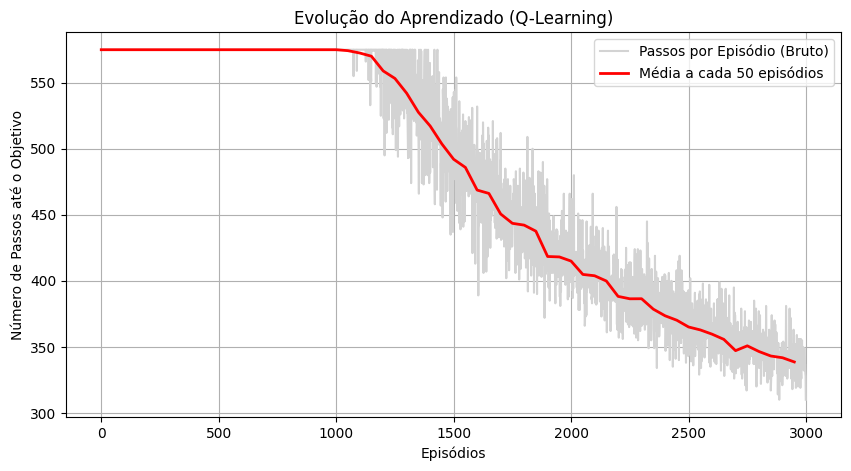


--- Teste Final (Pós-Treino) ---
--- Resolvendo com o Agente Treinado ---
SUCESSO: Objetivo encontrado!
Resultado Final: 263 passos em 0.0031s


In [124]:
def executar_agente_aprendizagem_completo(labirinto, inicio, fim):

    # 1. TREINAR (e pegar o histórico)
    # Aumente os episódios se o gráfico não estabilizar no final
    q_table, historico = q_learning_treinar(labirinto, inicio, fim, episodios=3000)

    # 2. ANALISAR (Gera gráfico e métricas)
    analisar_desempenho(historico)

    # 3. RESOLVER (Usa o cérebro treinado para o teste final)
    print("\n--- Teste Final (Pós-Treino) ---")
    # Reutilize sua função 'q_learning_resolver' que fizemos antes
    caminho, passos, tempo = q_learning_resolver(labirinto, inicio, fim, q_table)

    print(f"Resultado Final: {passos} passos em {tempo:.4f}s")


executar_agente_aprendizagem_completo(meu_labirinto, [22, 23], [11, 11])